In [361]:
from scripts.data_utils import *
import pickle
from sklearn.model_selection import train_test_split
from matplotlib import colors
import matplotlib.patches as mpatches
import matplotlib
import matplotlib.pyplot as plt

# Get users dictionary of european descent

In [179]:
eth_data = pd.read_csv("Simulation_data/ethinicity_data.csv")
display(eth_data)
white_dict = create_dict(eth_data, "ethnicity", "White")
print(list(white_dict.items())[:10])

,user_id,ethnicity
0,170822,White
1,849594,White
2,721878,White
3,562729,White
4,400123,White
...,...,...
14995,318280,Asian or Asian British
14996,880726,White
14997,887833,Mixed
14998,212711,White


[(170822, 1), (849594, 1), (721878, 1), (562729, 1), (400123, 1), (150755, 1), (614380, 1), (320172, 1), (969715, 1), (551096, 1)]


# Filter medication and condition data

In [180]:
med_data = pd.read_csv("Simulation_data/med_data.csv")
cond_data = pd.read_csv("Simulation_data/cond_data.csv")
display(med_data)
display(cond_data)

,user_id,med_ids
0,170822,1140866156
1,170822,1140879782
2,849594,1140862776
3,849594,1140874776
4,721878,1140866156
...,...,...
22073,756186,1140875420
22074,880726,1140875420
22075,887833,1140884090
22076,887833,1140867914


,user_id,cond_ids
0,170822,1424
1,170822,1367
2,170822,1260
3,170822,1493
4,170822,1545
...,...,...
34972,887833,1223
34973,887833,1441
34974,887833,1457
34975,887833,1705


In [181]:
med_data_eth = [white_dict[u] for u in med_data["user_id"]]
med_data["ethnicity"] = med_data_eth
filtered_med_data = med_data[med_data["ethnicity"]==1]
display(filtered_med_data)

,user_id,med_ids,ethnicity
0,170822,1140866156,1
1,170822,1140879782,1
2,849594,1140862776,1
3,849594,1140874776,1
4,721878,1140866156,1
...,...,...,...
22069,437662,1140870788,1
22071,756186,1140866156,1
22072,756186,1140879782,1
22073,756186,1140875420,1


In [182]:
cond_data_eth = [white_dict[u] for u in cond_data["user_id"]]
cond_data["ethnicity"] = cond_data_eth
filtered_cond_data = cond_data[cond_data["ethnicity"]==1]
display(filtered_cond_data)

,user_id,cond_ids,ethnicity
0,170822,1424,1
1,170822,1367,1
2,170822,1260,1
3,170822,1493,1
4,170822,1545,1
...,...,...,...
34960,437662,1130,1
34965,756186,1263,1
34966,756186,1596,1
34967,756186,1443,1


In [185]:
data = combine_data(filtered_med_data, filtered_cond_data)
display(data)

,user_id,med_ids,cond_ids
0,557063,"[1140862776, 1140874776]",[]
1,458764,[1140875420],"[1263, 1260, 1130, 1623, 1092, 1443, 1740, 170..."
2,425996,[],"[1705, 1726]"
3,589838,"[1140862776, 1140874776]",[]
4,884751,"[1140870164, 1141188524, 1140870788]",[1130]
...,...,...,...
9910,262121,"[1140879782, 1141153490]","[1424, 1545, 1625]"
9911,655339,"[1140866156, 1140879782, 1140917132, 1141153490]","[1424, 1525, 1545, 1596, 1625]"
9912,786413,[],"[1263, 1443]"
9913,491509,[],"[1424, 1260, 1545, 1625, 1705, 1726]"


In [205]:
print(filter_med) # Relative medication set to predicted label

[1140874498, 1140865670, 1140861832, 1140868496, 1140869778, 1141145896, 1140867888, 1140867504, 1140870194, 1140883520, 1140911680, 1140874304, 1140862026, 1141173328, 1140868816, 1140862424, 1141192410, 1141156836, 1140861924, 1140866280, 1141163114, 1189, 1140870788, 1140909708, 1140860696, 1141192736, 1141171496, 1140862776, 1140862266, 1141168714, 1141167308, 1141152848, 1140865634, 1141188594, 1141146234]


# Filter condition and medication set

In [206]:
med_list = create_filtered_set(list(set(med_data["med_ids"])), set(filter_med))
cond_list = create_filtered_set(list(set(cond_data["cond_ids"])), set([]))

# Create input data for topic model

In [208]:
input_arr, med_idx, cond_idx = create_input_file(data, med_list, cond_list)

In [355]:
new_input_arr = []
for arr_ in input_arr:
    if np.sum(arr_) != 0:
        new_input_arr.append(arr_)
input_arr = np.array(new_input_arr)

# Split data to train and test

In [211]:
train_arr, test_arr = train_test_split(input_arr, test_size=0.2)
np.save("Simulation_data/input/bow_train.npy", train_arr)
np.save("Simulation_data/input/bow_test.npy", test_arr)
with open("Simulation_data/input/cond_idx.pickle", "wb") as f:
    pickle.dump(cond_idx, f)
with open("Simulation_data/input/med_idx.pickle", "wb") as f:
    pickle.dump(med_idx, f)

# Create condition graph data for node2vec

In [59]:
cond_tree = pd.read_csv("Simulation_data/cond_tree.csv")
display(cond_tree)
cond_graph = create_cond_graph(cond_tree, "Simulation_data/graph_data")
display(cond_graph)

,meaning,node_id,parent_id
0,essential hypertension,1089,1081
1,gestational hypertension/pre-eclampsia,1090,1081
2,angina,1091,1082
3,heart attack/myocardial infarction,1092,1082
4,heart failure/pulmonary odema,1093,1082
...,...,...,...
457,fracture,1695,1077
458,heart/cardiac problem,1082,1071
459,liver/biliary/pancreas problem,1156,1073
460,muscle/soft tissue problem,1323,1077


,node1,node2
0,229,228
1,159,160
2,40,41
3,327,134
4,111,110
...,...,...
457,326,134
458,119,469
459,288,287
460,137,136


In [61]:
with open("Simulation_data/ATC_UK_dict.pickle", "rb") as f:
    ATC_UK = pickle.load(f)
atc_data = pd.read_csv("Simulation_data/atc_code.csv")
med_graph = create_med_graph(atc_data, ATC_UK, "Simulation_data/graph_data")
display(med_graph)

,node1,node2
0,4454,4448
1,1769,1757
2,3209,3190
3,3360,3359
4,2972,2954
...,...,...
6299,6052,6053
6300,6093,6091
6301,3345,3344
6302,3944,3932


# Run node2vec on cond_graph as in run_node2vec.sh

In [202]:
# Output of node2vec
with open("Simulation_data/graph_data/med_emb.pickle", "rb") as f:
    all_med_emb = pickle.load(f)
with open("Simulation_data/graph_data/cond_emb.pickle", "rb") as f:
    all_cond_emb = pickle.load(f)
with open("Simulation_data/graph_data/med_index_dict.pickle", "rb") as f:
    n2v_med_index = pickle.load(f)
with open("Simulation_data/graph_data/cond_index_dict.pickle", "rb") as f:
    n2v_cond_index = pickle.load(f)

In [213]:
n2v_idx_med = [n2v_med_index[k] for k in med_idx.keys()]
med_emb = []
for idx in n2v_idx_med:
    med_emb.append(all_med_emb[idx])

In [214]:
n2v_idx_cond = [n2v_cond_index[k] for k in cond_idx.keys()]
cond_emb = []
for idx in n2v_idx_cond:
    cond_emb.append(all_cond_emb[idx])

In [215]:
med_emb = np.array(med_emb)
cond_emb = np.array(cond_emb)
np.save("Simulation_data/input/cond_emb.npy", cond_emb)
np.save("Simulation_data/input/med_emb.npy", med_emb)

# Run getm as in run_metm.sh

In [222]:
pat_index = {u:i for i,u in enumerate(list(data["user_id"]))}
with open("Simulation_data/input/pat_index.pickle", "wb") as f:
    pickle.dump(pat_index, f)

In [244]:
def get_index(folder, data_folder, type_, subfolder="theta", results_folder="MT_results"):
    filename = os.path.join(results_folder, folder, f"{subfolder}_{type_}", "index.pkl")
    pat_index_file = os.path.join(data_folder, "pat_index.pickle")

    with open(filename,"rb") as f:
        index_list = pickle.load(f)
    pat_index = None
    if os.path.exists(pat_index_file):
#         print("Yes")
        with open(pat_index_file,"rb") as f:
            pat_index = pickle.load(f)
    new_pat_index = {}
    training_size = int(len(pat_index)*0.8)
    if type_ == "train":
        for pat, index in pat_index.items():
            if index < training_size:
                new_pat_index[pat] = index
    else:
        for pat, index in pat_index.items():
            if index >= training_size:
                new_pat_index[pat] = index - training_size        
            
    
    max_ = 0
    for index in index_list:
        cur_max = max(index)
        max_ = max(max_, cur_max)
        
    return index_list, max_+1, new_pat_index

def get_mu_theta(folder, topic_num, data_folder, type_, var_ ="mu_theta", subfolder="theta", results_folder=""):
    index_list, pnum, pat_index = get_index(folder, data_folder, type_, subfolder, results_folder) 
    theta = np.zeros((pnum, topic_num))
    
    for i, index in enumerate(index_list):
        theta_i = np.load(os.path.join(results_folder, folder, f"theta_{type_}", f"{var_}{i}.npy"))
        for j, idx in enumerate(index):
            theta[idx, :] = theta_i[j, :]
    return theta

# Get output of getm

In [330]:
# Topic mixture 
phi1 = np.load("Simulation_data/results/beta1.npy")
phi2 = np.load("Simulation_data/results/beta2.npy")

In [378]:
#condition $ medication class information
with open("/home/mcb/users/ywang515/getm/Simulation_data/cond_cat_dict.pickle", "rb") as f:
    cond_cat_dict = pickle.load(f)
with open("/home/mcb/users/ywang515/getm/Simulation_data/med_cat_dict.pickle", "rb") as f:
    med_cat_dict = pickle.load(f)

In [379]:
# Calculate topic_coherance & topic diversity
def get_top_words(phi, topic_nums, top_num, meta_name):
    for i in topic_nums:
        phi[i] = phi[i] / np.sum(phi[i])
    top_list = []
    top_list_token = []
    top_list_prob = []
    for i in topic_nums:
        top_idx = np.argsort(phi[i])[-top_num:]
        top_idx = top_idx[::-1]
        top = []
        top_prob = []
        for j in top_idx:
            p_w = phi[topic_nums, j]
            top_list.append(p_w)
            unique_token = meta_name[j]
            top.append(unique_token)
            top_prob.append(phi[i][j])
        top_list_token.append(top)
        top_list_prob.append(top_prob)
    top_list = np.array(top_list)
    top_list_token = np.array(top_list_token)
    top_list_prob = np.array(top_list_prob)
    return top_list, top_list_token, top_list_prob

def calc_tc(phi, topnum, topic_nums, metaname):
    tl, cats, tlp = get_top_words(phi, range(topic_nums), topnum, metaname)
    same_top = []
    for cat in cats:
        counted = defaultdict(int)
        for i in cat:
            counted[i] += 1
        count = [(k,v) for k, v in sorted(counted.items(), key=lambda item: item[1])]
        same_top.append(count[-1][1]/len(cat))
    return np.mean(same_top)

def calc_td(phi, metaname, topnum):
    x = phi.reshape(-1)
    indexes = np.argsort(x)[::-1]
    words = []
    for i in range(topnum):
        ind = indexes[i] % len(metaname)
        words.append(metaname[ind])
    td = len(set(words))/ len(words)
    return td

In [380]:
def get_unique_top_words(phi, topic_nums, top_num, metaname, thr=0.1):
    for i in topic_nums:
        phi[i] = phi[i] / np.sum(phi[i])
    unique_word_indices = []
    appeared = set([])
    for i in topic_nums:
        top_idx = np.argsort(phi[i])[::-1][:top_num]
        for idx in top_idx:
            if idx not in appeared and phi[i][idx]>thr:
                unique_word_indices.append(idx)
                appeared.add(idx)
    mat = []
    for i in topic_nums:
        mat.append(phi[i][unique_word_indices])
    mat = np.array(mat)
# 
    tokens = [metaname[i] for i in unique_word_indices]
    return mat, tokens
def plot_topics1(phi, topic_nums, metaname, catname, top_num, catlut, tag, \
                 thr=0.1, figsize=(15, 15),bbox_to_anchor=(1.,0.25, 2, 2), vmax=1, \
                 wratio = 0.02, wspace=-0.88, cax = [0.6, 0.75,0.3, 0.02], aspect=2, cmap="OrRd"):

    m, tokens = get_unique_top_words(phi,topic_nums, top_num, metaname, thr)
    _, cat = get_unique_top_words(phi, topic_nums, top_num, catname, thr)

    m = m.T

    unique_cat = list(sorted(np.unique(cat)))
    cat_index = {}
    for i, c in enumerate(unique_cat):
        cat_index[c] = i
    y = [cat_index[i] for i in cat]



    
    cmap1 = colors.ListedColormap([catlut[i] for i in unique_cat])

    nwords, ntopics = m.shape


    grid = dict(height_ratios=[0.5, m.shape[0]], width_ratios=[wratio * m.shape[1], 1])
    fig, axes = plt.subplots(ncols=2, nrows=2, gridspec_kw=grid, figsize=figsize)
 


    im = axes[1, 0].imshow(m, aspect='auto', cmap=cmap, vmax=vmax, interpolation="none")  # , norm=norm)

    if not y:  # y == None or type_list == None:
        axes[1, 1].axis("off")
    else:
        y = np.array(y)[:, np.newaxis]
        axes[1, 1].imshow(y, cmap=cmap1)# norm=norm)
        axes[1, 1].set_aspect(aspect)# norm=norm)

    axes[0, 1].axis("off")
    # limit length of words
    word_list = [str(w) for w in tokens]
    word_list = [w[:30] + str("..." if len(w) > 30 else "") for w in word_list]
    # labels y-axis - words
    axes[1, 0].set_yticks(np.arange(nwords), minor=False)
    axes[1, 0].set_yticklabels(word_list, fontsize=24, fontdict=None, minor=False)

    # labels x-axis - topics
    axes[1, 0].set_xticks(np.arange(ntopics), minor=False)
    axes[1, 0].set_xticklabels(topic_nums, fontdict=None, minor=False, rotation='0', fontsize=24)

    # labels y-axis - types
    axes[1, 1].set_xticks([])
    patches = []

    # positives
    for c in catlut.keys():
        patches.append(mpatches.Patch(color=catlut[c], label=c.lower()))


    # for col, lbl in zip(color_types[: len(np.unique(y))], np.unique(specpro_y)):
    #     print(col, lbl)
    #     patches.append(mpatches.Patch(color=col, label=lbl))
    axes[1, 1].legend(handles=patches, loc='lower left', bbox_to_anchor=bbox_to_anchor\
                     ,fontsize=24)
    # dot useful to position legend
    # axes[1, 1].scatter((1.), (0.5), s=81, c="limegreen", transform=axes[1, 1].transAxes)

    # titles
    axes[1, 0].set_xlabel('Topics', fontsize=24)
    axes[1, 0].set_ylabel(tag, fontsize=24)

    for ax in [axes[1, 1]]:
        ax.set_yticks([])  # ; ax.set_yticks([])

    plt.subplots_adjust(wspace=wspace, left=0.3, right=1.5)
    cax = plt.axes(cax)
    cb = fig.colorbar(im, cax=cax, orientation='horizontal', aspect=5)
    cb.ax.tick_params(labelsize=16) 


In [392]:
cat_med = [med_cat_dict[x] for x in med_list]
tc_med = calc_tc(phi1, 2, 5, cat_med)
print("med coherence: ", np.round(tc_med, 4))

cat_cond = [cond_cat_dict[x] for x in cond_list]
tc_cond = calc_tc(phi2, 2, 5, cat_cond)
print("cond coherence: ", np.round(tc_cond, 4))

td_med = calc_td(phi1, med_list, 5)
print("med divresity: ", np.round(td_med, 4))

td_cond = calc_td(phi2, cond_list, 5)
print("cond divresity: ", np.round(td_cond, 4))

print()
print("med quality: ", np.round(tc_med*td_med, 4))
print("cond quality: ", np.round(tc_cond*td_cond, 4))

med coherence:  0.7
cond coherence:  0.7
med divresity:  0.8
cond divresity:  1.0

med quality:  0.56
cond quality:  0.7


In [382]:
# Creat visualization color
newmedcat_lut = {'cardiovascular system':'#8bcbfb', \
                 'blood and blood forming organs':'#647be4',\
                'dermatologicals':'#3b0ab6',\
                'systemic hormonal preparations, excl. sex hormones and insulins':'#f89393',\
                'alimentary tract and metabolism':'#990d59',\
                'antineoplastic and immunomodulating agents':'#992989',\
                'antiinfectives for systemic use':'#554b0b',\
                'antiparasitic products, insecticides and repellents':'#9dad06',\
                'musculo-skeletal system':'#51f36e',\
                'nervous system': '#d63939',
                'sensory organs':'#a82f2f',\
                'genito urinary system and sex hormones':'#67a643',\
                'respiratory system': '#e1cc4d',\
                'various':'#ac6107'}

newcondcat_lut = {'cardiovascular':'#8bcbfb',\
                 'haematology/dermatology':'#647be4',\
                 'endocrine/diabetes': '#f89393',\
                 'gastrointestinal/abdominal':'#990d59',\
                 'immunological/systemic disorders': '#992989',\
                 'infections': '#554b0b',\
                 'musculoskeletal/trauma':'#51f36e',\
                 'neurology/eye/psychiatry': '#d63939',\
                 'renal/urology': '#67a643',\
                 'gynaecology/breast': '#26690b',\
                 'respiratory/ent': '#e1cc4d'}
medlut_cat = {v:k for k, v in newmedcat_lut.items()}
condlut_cat = {v:k for k, v in newcondcat_lut.items()}

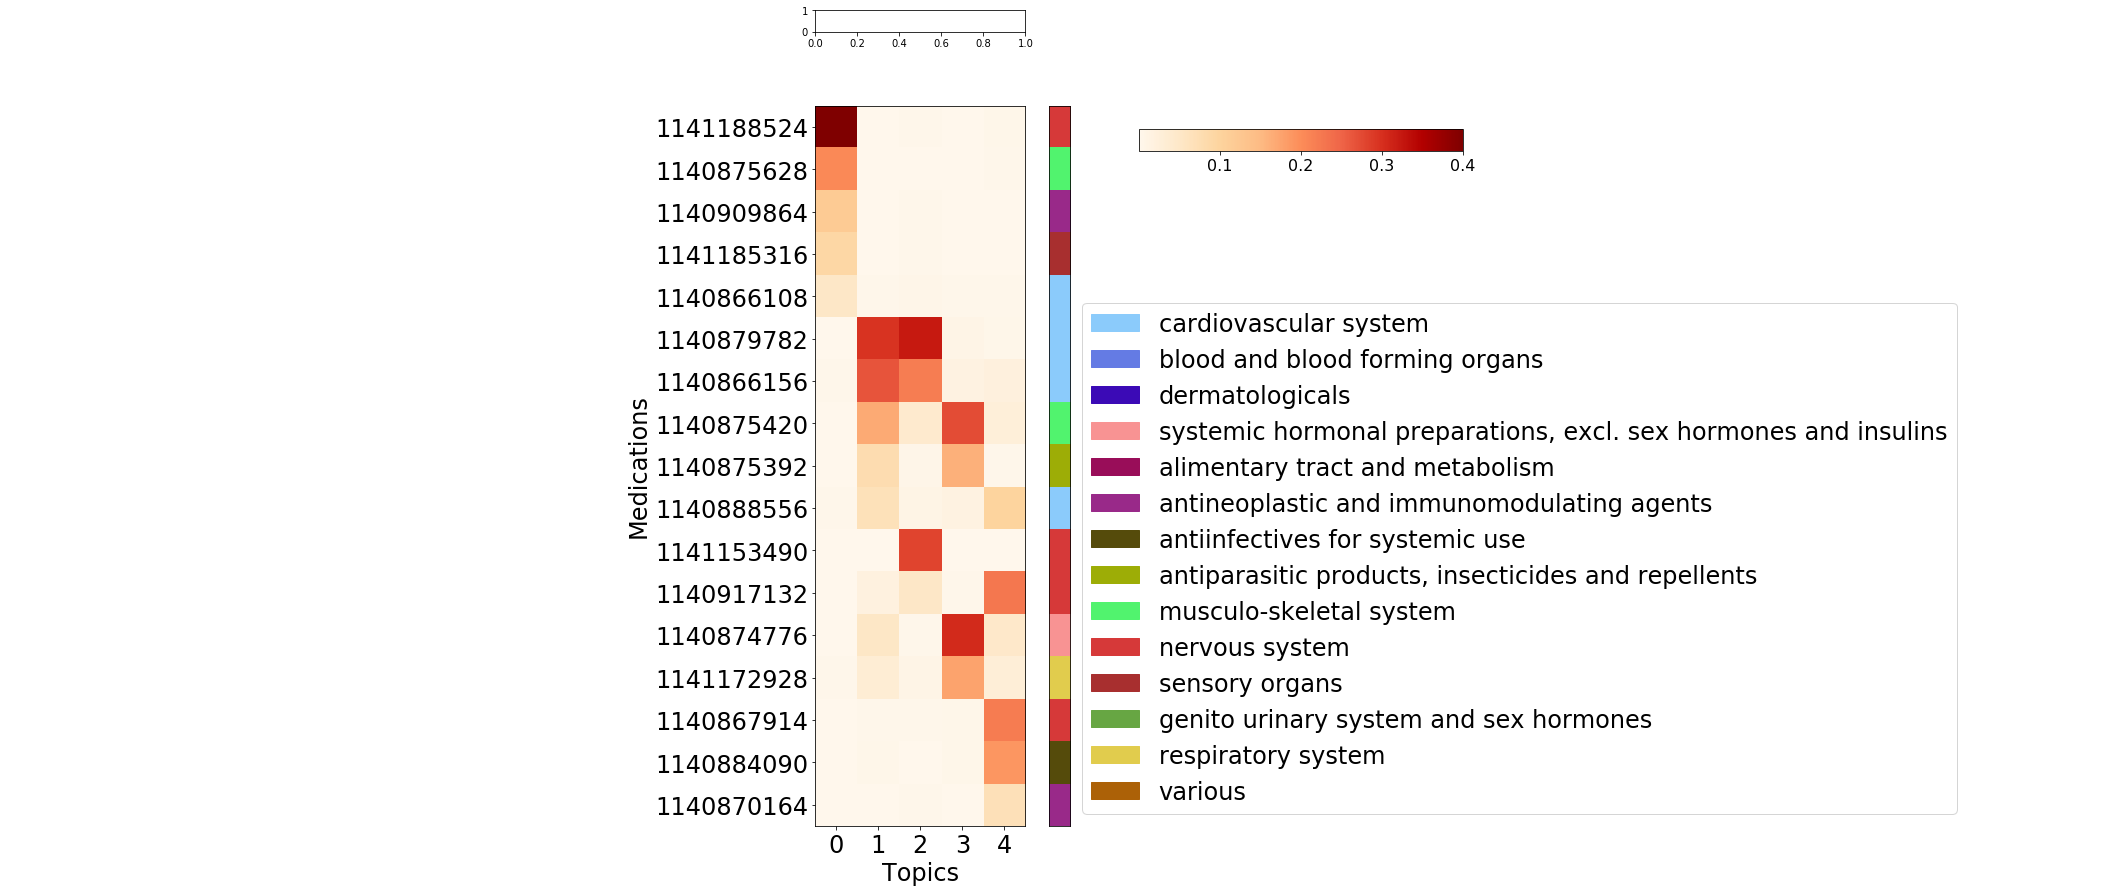

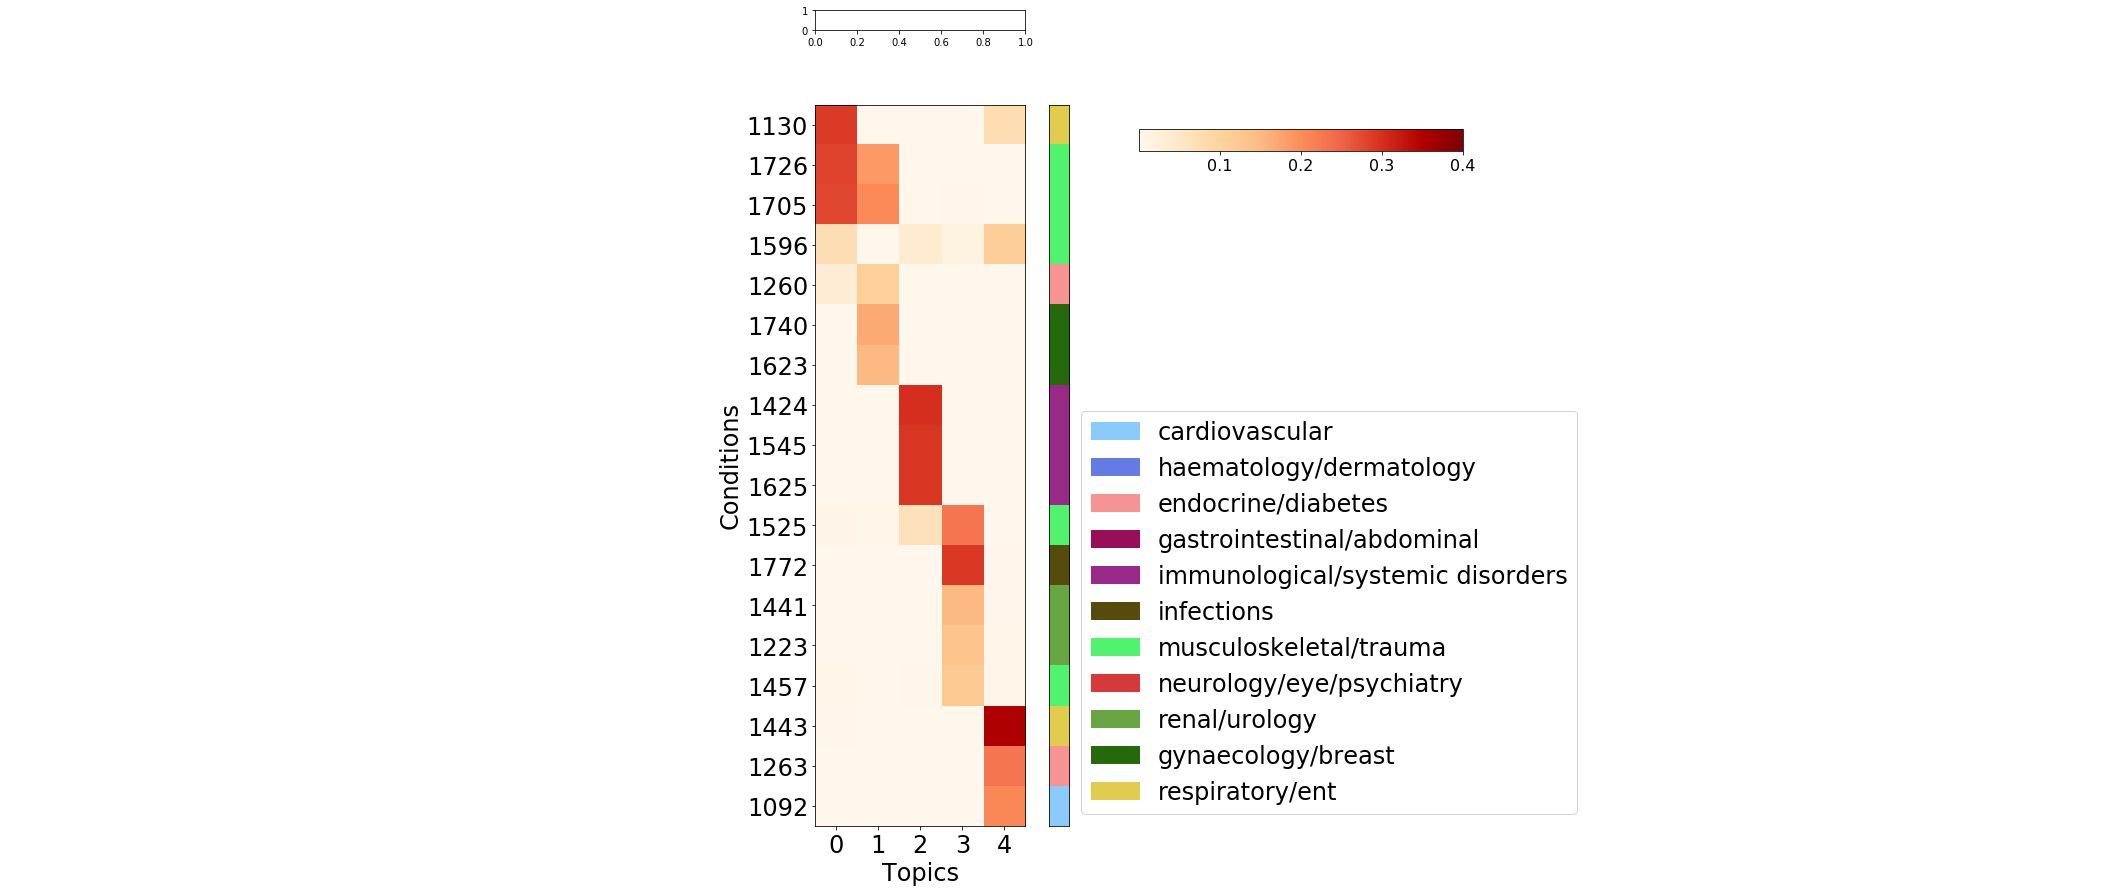

In [398]:
plot_topics1(phi1, range(5), med_list, cat_med, 5, newmedcat_lut, "Medications",thr=0.00,\
            bbox_to_anchor=(1,0, 2, 2), vmax=0.4, aspect=2)
plt.savefig("Simulation_data/results/med_tq.png", bbox_inches="tight")
plot_topics1(phi2, range(5), cond_list, cat_cond, 5, newcondcat_lut, "Conditions",thr=0.00,\
            bbox_to_anchor=(1,0, 2, 2), vmax=0.4, aspect=2)
plt.savefig("Simulation_data/results/cond_tq.png", bbox_inches="tight")

In [326]:
X_train = get_mu_theta("Simulation_data/results", 5,
                           "Simulation_data/input", "train")
X_test = get_mu_theta("Simulation_data/results", 5,
                          "Simulation_data/input", "test")

In [297]:
np.save("Simulation_data/prediction/X_train.npy", X_train)
np.save("Simulation_data/prediction/X_test.npy", X_test)

In [316]:
# Get data from prediction
y_train = np.load("Simulation_data/prediction/Y_train.npy")
y_test = np.load("Simulation_data/prediction/Y_test.npy")
y_pred = np.load("Simulation_data/prediction/y_p_pred.npy")
y_proba = np.load("Simulation_data/prediction/y_p_proba.npy")


In [317]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

0.8389


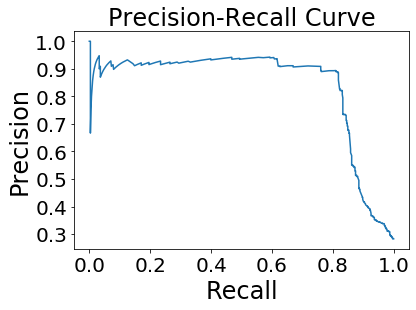

In [406]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
prc_score = auc(recall, precision)
print(np.round(prc_score,4))
plt.plot(recall, precision)
plt.ylabel('Precision', fontsize=24)
plt.xlabel('Recall', fontsize=24)
plt.title("Precision-Recall Curve", fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig("Simulation_data/AUPRC.png")

0.8997


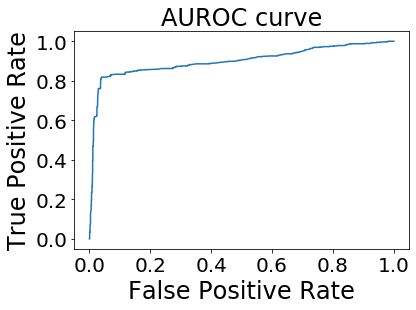

In [407]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_score = auc(fpr, tpr)
print(np.round(roc_score,4))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate', fontsize=24)
plt.xlabel('False Positive Rate', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("AUROC curve", fontsize=24)

plt.savefig("Simulation_data/AUROC.png")